<center><h1>Predict schizophrenia using brain anatomy</h1></center>

Predict schizophrenia from brain grey matter (GM). schizophrenia is associated with diffuse and complex pattern of brain atrophy. We will try to learn a predictor of the clinical status (patient with schizophrenia vs. healthy control) using GM measurements on the brain participants.


## Dataset

There are 410 samples in the training set and 103 samples in the test set.


### Input data

Voxel-based_morphometry [VBM](https://en.wikipedia.org/wiki/Voxel-based_morphometry)
using [cat12](http://www.neuro.uni-jena.de/cat/) software which provides:

- Regions Of Interest (`rois`) of Grey Matter (GM) scaled for the Total
  Intracranial Volume (TIV): `[train|test]_rois.csv` 284 features.

- VBM GM 3D maps or images (`vbm3d`) of [voxels](https://en.wikipedia.org/wiki/Voxel) in the
  [MNI](https://en.wikipedia.org/wiki/Talairach_coordinates) space:
  `[train|test]_vbm.npz` contains 3D images of shapes (121, 145, 121).
  This npz contains the 3D mask and the affine transformation to MNI
  referential. Masking the brain provide *flat* 331 695 input features (voxels)
  for each participant.

By default `problem.get_[train|test]_data()` return the concatenation of 284 ROIs of
Grey Matter (GM) features with 331 695 features (voxels) within a brain mask.
Those two blocks are higly redundant.
To select only on ROIs (`rois`) features do:

```
X[:, :284]
```

To select only on (`vbm`) (voxel with the brain) features do:

```
X[:, 284:]
```

### Target

The target can be found in `[test|train]_participants.csv` files, selecting the
`diagnosis` column for a classification problem.

## Evaluation metrics

The main Evaluation metrics is the AUC. We will also look at the bACC (Balanced Accuracy)


## Installation

This starting kit requires Python and the following dependencies:

* `numpy`
* `scipy`
* `pandas`
* `scikit-learn`
* `matplolib`
* `seaborn`
* `jupyter`
* `ramp-workflow`

To run a submission and the notebook you will need the dependencies listed in requirements.txt.
You can install the dependencies with the following command-line:

```
pip install -U -r requirements.txt
```

## Getting started

1. Download the data locally:

```
python download_data.py
```

2. Submission (Run locally)

The submissions need to be located in the `submissions` folder.
For instance for `starting_kit`, it should be located in
`submissions/starting_kit`.

Copy everything required to build your estimator in a submission file:
`submissions/starting_kit/estimator.py`.
This file must contain a function `get_estimator()`.

Run locally:

```
ramp-test --submission starting_kit
```

## Descriptive statistics

         age                                                    
       count       mean        std   min   25%   50%   75%   max
set                                                             
test   103.0  33.466019  12.809935  14.0  23.5  31.0  41.0  66.0
train  410.0  33.068293  12.562225  15.0  22.0  29.0  43.0  65.0
           age
set   sex     
test  0.0   65
      1.0   38
train 0.0  257
      1.0  153


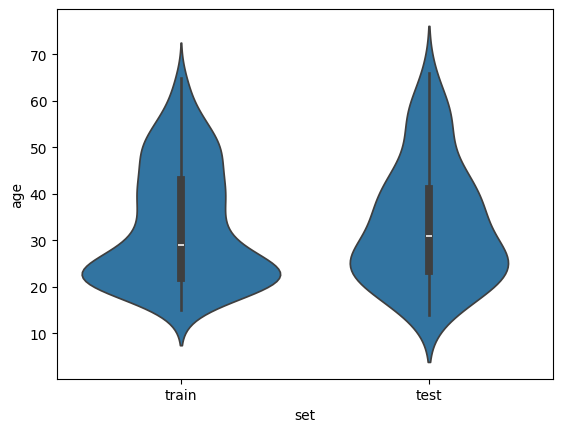

In [1]:
%matplotlib inline
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

participants_train = pd.read_csv(os.path.join("data", "train_participants.csv" ))
participants_train["set"] = 'train'
participants_test = pd.read_csv(os.path.join("data", "test_participants.csv" ))
participants_test["set"] = 'test'
participants = pd.concat([participants_train, participants_test])

sns.violinplot(x="set", y="age", data=participants)
print(participants[["age", "set"]].groupby("set").describe())
print(participants[["set", "sex", "age"]].groupby(["set", "sex"]).count())

In [2]:
participants_train

,participant_id,session,sex,age,diagnosis,study,site,TIV,CSF_Vol,GM_Vol,WM_Vol,set
0,CH7098a,V1,0.0,20.0,schizophrenia,SCHIZCONNECT-VIP,NU,1712.357084,375.529152,747.089338,586.391159,train
1,A00024535,V1,0.0,26.0,control,SCHIZCONNECT-VIP,MRN,1700.601735,399.493745,721.128411,579.446172,train
2,CC7563,V1,1.0,28.0,control,SCHIZCONNECT-VIP,WUSTL,1449.327365,220.825294,661.028439,566.500051,train
3,CC3945,V1,1.0,21.0,control,SCHIZCONNECT-VIP,WUSTL,1184.699000,201.579922,560.051329,423.016129,train
4,CH8853b,V1,1.0,21.0,control,SCHIZCONNECT-VIP,NU,1518.198466,291.544632,705.384606,520.807601,train
...,...,...,...,...,...,...,...,...,...,...,...,...
405,CC6606,V1,1.0,23.0,schizophrenia,SCHIZCONNECT-VIP,WUSTL,1169.876325,235.110075,532.676827,401.825749,train
406,NM1088,V1,1.0,43.0,schizophrenia,SCHIZCONNECT-VIP,WUSTL,1264.250903,202.266971,594.563513,466.623251,train
407,NM8724,V1,0.0,25.0,schizophrenia,SCHIZCONNECT-VIP,WUSTL,1326.247902,267.535157,620.174353,438.148000,train
408,NM4038,V1,0.0,57.0,schizophrenia,SCHIZCONNECT-VIP,WUSTL,1663.159408,418.559408,648.417341,594.962631,train


In [3]:
participants_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 410 entries, 0 to 409
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   participant_id  410 non-null    object 
 1   session         410 non-null    object 
 2   sex             410 non-null    float64
 3   age             410 non-null    float64
 4   diagnosis       410 non-null    object 
 5   study           410 non-null    object 
 6   site            410 non-null    object 
 7   TIV             410 non-null    float64
 8   CSF_Vol         410 non-null    float64
 9   GM_Vol          410 non-null    float64
 10  WM_Vol          410 non-null    float64
 11  set             410 non-null    object 
dtypes: float64(6), object(6)
memory usage: 38.6+ KB


In [62]:
participants.describe(include='all')

,participant_id,session,sex,age,diagnosis,study,site,TIV,CSF_Vol,GM_Vol,WM_Vol,set
count,513,513,513.000000,513.000000,513,513,513,513.000000,513.000000,513.000000,513.000000,513
unique,513,1,NaN,NaN,2,1,3,NaN,NaN,NaN,NaN,2
top,A00024953,V1,NaN,NaN,control,SCHIZCONNECT-VIP,WUSTL,NaN,NaN,NaN,NaN,train
freq,1,513,NaN,NaN,277,513,269,NaN,NaN,NaN,NaN,410
mean,NaN,NaN,0.372320,33.148148,NaN,NaN,NaN,1426.607843,284.849383,625.735858,514.981154,NaN
std,NaN,NaN,0.483895,12.600746,NaN,NaN,NaN,149.019602,68.807070,74.945900,63.742644,NaN
min,NaN,NaN,0.000000,14.000000,NaN,NaN,NaN,1071.499793,144.985388,428.563675,359.708027,NaN
25%,NaN,NaN,0.000000,23.000000,NaN,NaN,NaN,1327.256106,232.636949,570.983541,472.661075,NaN
50%,NaN,NaN,0.000000,29.000000,NaN,NaN,NaN,1420.479557,275.634286,620.268996,509.191309,NaN
75%,NaN,NaN,1.000000,43.000000,NaN,NaN,NaN,1531.174963,325.010302,677.852937,559.486417,NaN


## Unsupervized analysis: Explore main sources of variabilities

Load ROIs data, `train_rois.csv` provides:

- Global volumes of "tissues": CerrebroSpinal Fluid (`CSF_Vol`), Grey (`GM_Vol`) and White Matter (`WM_Vol`) volume of participants.
- ROIs are starting at column `l3thVen_GM_Vol`. Note that `rois_train.loc[:, 'l3thVen_GM_Vol':]` matches `problem.get_train_data()[:, :284]`.

In [2]:
rois_train = pd.read_csv(os.path.join("data", "train_rois.csv" )).loc[:, 'l3thVen_GM_Vol':]
rois_test = pd.read_csv(os.path.join("data", "test_rois.csv" )).loc[:, 'l3thVen_GM_Vol':]
rois = pd.concat([rois_train, rois_test])

In [6]:
rois_train

,l3thVen_GM_Vol,r3thVen_GM_Vol,l4thVen_GM_Vol,r4thVen_GM_Vol,lAcc_GM_Vol,rAcc_GM_Vol,lAmy_GM_Vol,rAmy_GM_Vol,lBst_GM_Vol,rBst_GM_Vol,...,lSupParLo_CSF_Vol,rSupParLo_CSF_Vol,lSupTemGy_CSF_Vol,rSupTemGy_CSF_Vol,lTemPo_CSF_Vol,rTemPo_CSF_Vol,lInfFroAngGy_CSF_Vol,rInfFroAngGy_CSF_Vol,lTemTraGy_CSF_Vol,rTemTraGy_CSF_Vol
0,0.063950,0.058779,0.062019,0.063885,0.459166,0.495607,0.983571,1.016309,0.472519,0.458482,...,7.488130,8.622047,2.465118,2.656249,6.584050,6.213031,1.787291,2.043806,0.406808,0.403986
1,0.047534,0.044989,0.053391,0.068330,0.450894,0.434376,1.011141,0.993529,0.226344,0.301962,...,9.022685,8.544778,2.439144,2.533854,6.849889,6.730247,1.945829,2.325559,0.312825,0.426095
2,0.118209,0.088380,0.069014,0.053907,0.532099,0.547899,1.013026,0.963916,0.473561,0.486732,...,4.219249,4.258448,1.394717,1.773845,3.537319,3.663182,1.007794,0.856915,0.162711,0.193604
3,0.102882,0.084044,0.044932,0.045765,0.456206,0.459221,0.875521,0.814790,0.502073,0.506276,...,3.678205,3.383453,1.346163,1.897148,3.623939,3.865042,1.237802,1.206910,0.218570,0.204934
4,0.067550,0.065347,0.047114,0.051132,0.474947,0.491112,0.977416,0.973828,0.440044,0.484388,...,7.231215,7.043181,2.161728,2.069372,3.730283,4.239948,1.418323,1.626568,0.278396,0.292313
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
405,0.068794,0.059518,0.046980,0.043630,0.434336,0.447574,0.851783,0.817232,0.379264,0.413908,...,5.072565,5.172242,1.898523,2.106861,3.237992,3.484974,1.335857,1.564092,0.234161,0.205059
406,0.082916,0.074117,0.067785,0.085905,0.355993,0.365854,0.948117,0.946708,0.345744,0.406607,...,3.162422,3.361590,1.248071,1.557411,2.514094,3.588325,0.897506,0.753853,0.114496,0.105789
407,0.053060,0.052045,0.072046,0.082462,0.545795,0.541902,0.748822,0.771230,0.569814,0.808785,...,6.295410,4.833185,1.961965,2.725465,4.364348,4.952391,1.545312,1.648777,0.230619,0.355192
408,0.045729,0.042121,0.069377,0.073696,0.447633,0.459983,1.095141,1.091655,0.504735,0.576775,...,7.388551,7.142477,3.123366,3.843983,5.997726,6.851738,2.144755,1.862476,0.637902,0.591713


In [4]:
rois.describe(include='all')

,l3thVen_GM_Vol,r3thVen_GM_Vol,l4thVen_GM_Vol,r4thVen_GM_Vol,lAcc_GM_Vol,rAcc_GM_Vol,lAmy_GM_Vol,rAmy_GM_Vol,lBst_GM_Vol,rBst_GM_Vol,...,lSupParLo_CSF_Vol,rSupParLo_CSF_Vol,lSupTemGy_CSF_Vol,rSupTemGy_CSF_Vol,lTemPo_CSF_Vol,rTemPo_CSF_Vol,lInfFroAngGy_CSF_Vol,rInfFroAngGy_CSF_Vol,lTemTraGy_CSF_Vol,rTemTraGy_CSF_Vol
count,513.000000,513.000000,513.000000,513.000000,513.000000,513.000000,513.000000,513.000000,513.000000,513.000000,...,513.000000,513.000000,513.000000,513.000000,513.000000,513.000000,513.000000,513.000000,513.000000,513.000000
mean,0.068160,0.054834,0.060132,0.063641,0.443158,0.442090,0.930949,0.910306,0.401334,0.429184,...,5.794808,5.877718,1.911085,2.330988,4.200153,4.554192,1.412646,1.422403,0.281847,0.280373
std,0.021483,0.014120,0.010804,0.012789,0.063357,0.059369,0.115143,0.108542,0.152199,0.166779,...,1.641171,1.727097,0.560823,0.591117,1.240402,1.176034,0.408748,0.386539,0.120394,0.106798
min,0.026151,0.019970,0.035449,0.038116,0.278686,0.269508,0.571356,0.518480,0.143621,0.176327,...,2.434086,2.343344,0.666104,0.925935,1.713793,1.937265,0.444807,0.657370,0.070825,0.068818
25%,0.052646,0.044989,0.052870,0.054812,0.397270,0.398861,0.852517,0.832147,0.298792,0.319890,...,4.570834,4.593699,1.498517,1.914472,3.219102,3.663182,1.104625,1.136123,0.193154,0.203323
50%,0.064382,0.052941,0.058734,0.061262,0.440586,0.442424,0.927352,0.911009,0.396754,0.414215,...,5.569748,5.663730,1.891383,2.307562,3.992964,4.364099,1.365875,1.388802,0.263362,0.261072
75%,0.079631,0.062883,0.065624,0.069322,0.484076,0.477861,1.004678,0.979480,0.479181,0.502222,...,6.861349,6.865179,2.270427,2.681728,4.991152,5.304261,1.663102,1.677346,0.346469,0.348184
max,0.160981,0.106771,0.105759,0.158973,0.634865,0.627328,1.243911,1.225342,2.029313,2.015711,...,11.070928,11.227106,4.269030,5.033381,8.360051,9.017830,2.794183,2.769662,0.951132,0.679091


### PCA on ROIs: explore global effect of age

                 sum_sq     df          F        PR(>F)
diagnosis   2606.207928    1.0  29.245287  9.808873e-08
Residual   45538.013350  511.0        NaN           NaN
                 sum_sq     df          F    PR(>F)
diagnosis    791.094363    1.0  10.876419  0.001042
Residual   37167.493121  511.0        NaN       NaN


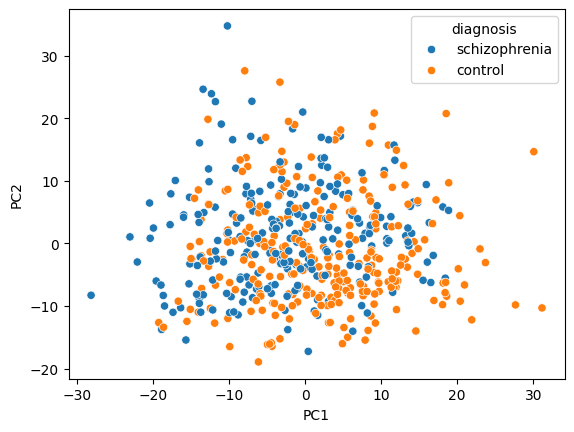

In [5]:
from sklearn.decomposition import PCA
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms

PCs = PCA(n_components=2).fit_transform(rois)
participants['PC1'], participants['PC2']  = PCs[:, 0], PCs[:, 1]

sns.scatterplot (x="PC1", y="PC2", hue="diagnosis",  data=participants)
oneway = smf.ols('PC1 ~ diagnosis', participants).fit()
print(sm.stats.anova_lm(oneway, typ=2))
oneway = smf.ols('PC2 ~ diagnosis', participants).fit()
print(sm.stats.anova_lm(oneway, typ=2))

Diagnosis is associated with two first components, we expect to be abble to predict the diagnosis

## Machine learning


Import and read data

In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.svm import NuSVC
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import VotingClassifier

from sklearn.base import BaseEstimator
import sklearn.preprocessing as preprocessing
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_validate
import sklearn.metrics as metrics
import problem
from sklearn.metrics import balanced_accuracy_score, roc_auc_score, roc_curve
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.base import BaseEstimator
from sklearn.base import TransformerMixin

import optuna
from joblib import dump, load
import itertools
import shap

Load concatenated data: 284 features from ROIs and 331,695 features from VBM.

In [7]:
X_train, y_train = problem.get_train_data(path=".", datatype=["rois"])
X_test, y_test = problem.get_test_data(path=".", datatype=["rois"])

assert X_train.shape[1] == 284

## Feature extractor of ROIs or voxels within the brain (VBM)

Selecting only rois or vbm images:

This can be achieved by a `ROIsFeatureExtractor` or `VBMFeatureExtractor` 

In [8]:
class ROIsFeatureExtractor(BaseEstimator, TransformerMixin):
    """Select only the 284 ROIs features:"""
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X[:, :284]

class VBMFeatureExtractor(BaseEstimator, TransformerMixin):
    """Select only the 284 ROIs features:"""
    def fit(self, X, y):
        return self

    def transform(self, X):
        return X[:, 284:]


fe = ROIsFeatureExtractor()
print(fe.transform(X_train).shape)

# fe = VBMFeatureExtractor()
# print(fe.transform(X_train).shape)

(410, 284)


## Design of predictors and their evaluation using CV and test set

The framework is evaluated with a cross-validation approach. The metrics used are the ROC-AUC (auc) and the balanced Accuracy (bacc).

### Functions

In [9]:
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)  # Encode 'control' -> 0, 'schizophrenia' -> 1
y_test = label_encoder.transform(y_test)

In [10]:
def create_pipeline(model):
    """Create a pipeline with the specified model."""
    return make_pipeline(
        ROIsFeatureExtractor(),
        StandardScaler(),
        model
    )

In [11]:
def evaluate_model(estimator, X_train, y_train, cv):
    """Perform cross-validation and return average scores with standard deviation."""
    scoring = ['balanced_accuracy', 'roc_auc']
    try:
        cv_results = cross_validate(estimator, X_train, y_train, scoring=scoring, cv=cv,
                                     return_train_score=True, n_jobs=1, verbose=1)
        mean_bal_acc = cv_results['test_balanced_accuracy'].mean()
        std_bal_acc = cv_results['test_balanced_accuracy'].std()
        mean_roc_auc = cv_results['test_roc_auc'].mean()
        std_roc_auc = cv_results['test_roc_auc'].std()

        return {
            'balanced_accuracy': mean_bal_acc,
            'roc_auc': mean_roc_auc,
            'std_balanced_accuracy': std_bal_acc,
            'std_roc_auc': std_roc_auc,
        }
    except Exception as e:
        print(f"Cross-validation failed: {e}")
        return {
            'balanced_accuracy': 0,
            'roc_auc': 0,
            'std_balanced_accuracy': 0,
            'std_roc_auc': 0,
        }

In [12]:
def test_model(estimator, X_train, y_train, X_test, y_test):
    """Train the model and evaluate on the test set with ROC curve visualization."""

    # Train the model on the full training set
    estimator.fit(X_train, y_train)

    # Predictions for train and test sets
    y_pred_train = estimator.predict(X_train)
    y_score_train = estimator.predict_proba(X_train)[:, 1]
    y_pred_test = estimator.predict(X_test)
    y_score_test = estimator.predict_proba(X_test)[:, 1]

    # Metrics for train and test sets
    bacc_train = balanced_accuracy_score(y_train, y_pred_train)
    roc_auc_train = roc_auc_score(y_train, y_score_train)
    bacc_test = balanced_accuracy_score(y_test, y_pred_test)
    roc_auc_test = roc_auc_score(y_test, y_score_test)

    # Plot ROC curve
    fpr_train, tpr_train, _ = roc_curve(y_train, y_score_train)
    fpr_test, tpr_test, _ = roc_curve(y_test, y_score_test)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr_train, tpr_train, label=f"Train ROC-AUC: {roc_auc_train:.4f}", linestyle='--')
    plt.plot(fpr_test, tpr_test, label=f"Test ROC-AUC: {roc_auc_test:.4f}")
    plt.plot([0, 1], [0, 1], color="grey", linestyle=":")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.legend()
    plt.grid()
    plt.show()

    return {
        'train_balanced_accuracy': bacc_train,
        'train_roc_auc': roc_auc_train,
        'test_balanced_accuracy': bacc_test,
        'test_roc_auc': roc_auc_test
    }

### Logistic Regression

Cross-Validation Results:
Balanced Accuracy: 0.7572184864290128 ± 0.06023635012842187
ROC-AUC: 0.823117591275486 ± 0.04685038913534617


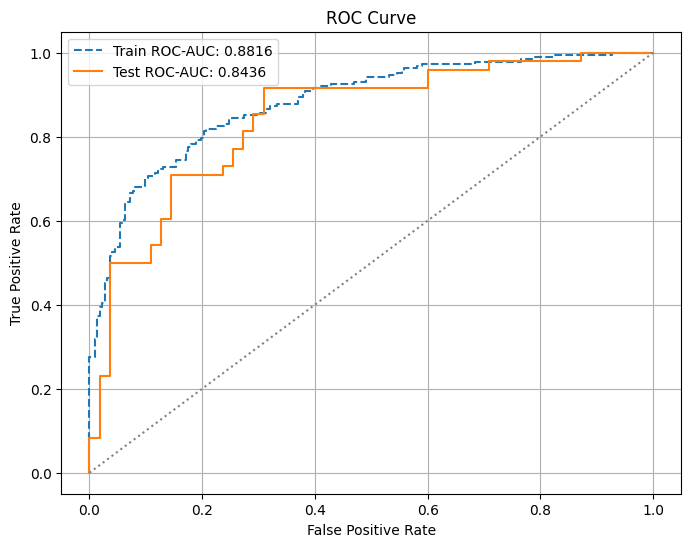

Test Set Results:
Balanced Accuracy: 0.781439393939394
ROC-AUC: 0.8435606060606061


In [13]:
# Best parameters from Optuna
reglog_model = create_pipeline(
    LogisticRegression( 
        C=0.1,
        max_iter=10000,                
        penalty='l1', 
        solver= 'liblinear',
        random_state=42,
    )
)

# Cross-validation evaluation with standard deviation
cv_results_reglog = evaluate_model(reglog_model, X_train, y_train, problem.get_cv(X_train, y_train))
print("Cross-Validation Results:")
print(f"Balanced Accuracy: {cv_results_reglog['balanced_accuracy']:} ± {cv_results_reglog['std_balanced_accuracy']:}")
print(f"ROC-AUC: {cv_results_reglog['roc_auc']:} ± {cv_results_reglog['std_roc_auc']:}")

# Test set evaluation
test_results_reglog = test_model(reglog_model, X_train, y_train, X_test, y_test)
print("Test Set Results:")
print(f"Balanced Accuracy: {test_results_reglog['test_balanced_accuracy']:}")
print(f"ROC-AUC: {test_results_reglog['test_roc_auc']:}")

### SVC

In [15]:
def objective_svc(trial, X_train, y_train, cv, study, study_file):
    """Objective function for SVC hyperparameter tuning."""
    try:
        # Define hyperparameter search space
        param_grid = {
            'C': trial.suggest_float('C', 1e-3, 1e3, log=True),
            'kernel': trial.suggest_categorical('kernel', ['linear', 'poly', 'rbf', 'sigmoid']),
            'gamma': trial.suggest_categorical('gamma', ['scale', 'auto']),
        }

        # Create pipeline with SVC
        pipeline = create_pipeline(
            SVC(
                probability=True,
                random_state=42,
                **param_grid
            )
        )

        # Perform cross-validation
        results = evaluate_model(pipeline, X_train, y_train, cv)

        # Save the study after each trial
        dump(study, study_file)
        print(f"Study saved to {study_file} after trial {trial.number}")

        return results['roc_auc']
    except Exception as e:
        print(f"Trial failed: {e}")
        # Return a low score for failed trials to ensure they're ignored
        return 0.0

In [20]:
# Load or create the study
study_file_svc = "studies/svc_study.joblib"
if os.path.exists(study_file_svc):
    study_svc = load(study_file_svc)
    print(f"Loaded existing study from {study_file_svc}")
else:
    study_svc = optuna.create_study(direction="maximize")
    print("Created a new study.")


Loaded existing study from studies/svc_study.joblib


In [21]:
# Run the optimization
study_svc.optimize(
    lambda trial: objective_svc(trial, X_train, y_train, problem.get_cv(X_train, y_train), study_file_svc),
    n_trials=0 # was 1000 initially
)

# Save the final study
dump(study_svc, study_file_svc)
print(f"Final study saved to {study_file_svc}")

# Print the best hyperparameters and score
print("Best Hyperparameters:", study_svc.best_params)
print("Best ROC-AUC from CV:", study_svc.best_value)

Final study saved to studies/svc_study.joblib
Best Hyperparameters: {'C': 0.0038314948719968436, 'kernel': 'linear', 'gamma': 'scale'}
Best ROC-AUC from CV: 0.8395569492937913


Cross-Validation Results:
Balanced Accuracy: 0.7174522608733136 ± 0.036489897967519905
ROC-AUC: 0.8395569492937913 ± 0.030774571077422267


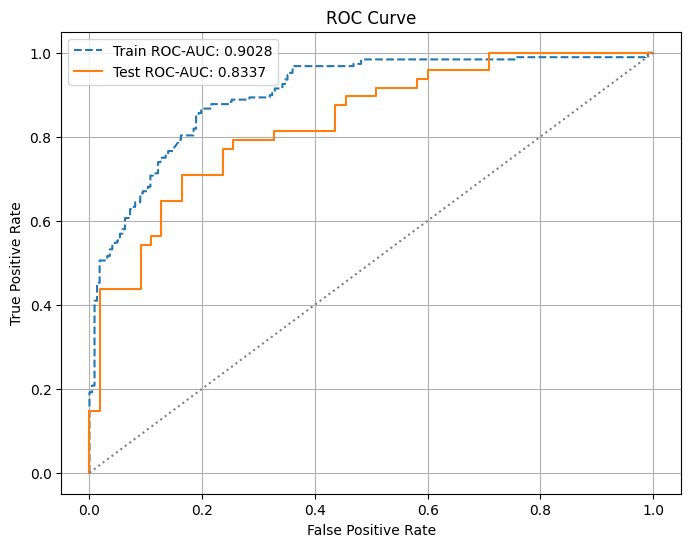

Test Set Results:
Balanced Accuracy: 0.759280303030303
ROC-AUC: 0.8337121212121211


In [22]:
svc_model = create_pipeline(
    SVC(
        probability=True,
        random_state=42,
        C=0.0038314948719968436,
        kernel="linear",
        gamma="scale",
    )
)

# Cross-validation evaluation with standard deviation
cv_results_svc = evaluate_model(svc_model, X_train, y_train, problem.get_cv(X_train, y_train))
print("Cross-Validation Results:")
print(f"Balanced Accuracy: {cv_results_svc['balanced_accuracy']:} ± {cv_results_svc['std_balanced_accuracy']:}")
print(f"ROC-AUC: {cv_results_svc['roc_auc']:} ± {cv_results_svc['std_roc_auc']:}")

# Test set evaluation
test_results_svc = test_model(svc_model, X_train, y_train, X_test, y_test)
print("Test Set Results:")
print(f"Balanced Accuracy: {test_results_svc['test_balanced_accuracy']:}")
print(f"ROC-AUC: {test_results_svc['test_roc_auc']:}")

### NuSVC

In [23]:
def objective_nusvc(trial, X_train, y_train, cv, study_file):
    """Objective function for Nu-SVC hyperparameter tuning with Optuna."""
    try:
        # Define the hyperparameter search space
        param_grid = {
            'nu': trial.suggest_float('nu', 0.1, 0.9, step=0.1),
            'kernel': trial.suggest_categorical('kernel', ['linear', 'rbf', 'poly', 'sigmoid']),
            'gamma': trial.suggest_categorical('gamma', ['scale', 'auto'])
        }

        # Create the pipeline with Nu-SVC
        pipeline = create_pipeline(
            NuSVC(
                **param_grid,
                probability=True,  # Needed for ROC-AUC
                random_state=42
            )
        )

        # Perform cross-validation
        results = cross_validate(pipeline, X_train, y_train, cv=cv, scoring='roc_auc', n_jobs=1, verbose=1)
        mean_score = results['test_score'].mean()

        # Save the study after each trial
        dump(study, study_file)
        print(f"Study saved to {study_file} after trial {trial.number}")

        return mean_score
    except Exception as e:
        print(f"Trial failed: {e}")
        return None


In [24]:
# Load or create the study
study_file_nusvc = "studies/nusvc_study.joblib"
if os.path.exists(study_file_nusvc):
    study_nusvc = load(study_file_nusvc)
    print(f"Loaded existing study from {study_file_nusvc}")
else:
    study_nusvc = optuna.create_study(direction="maximize")
    print("Created a new study.")


Loaded existing study from studies/nusvc_study.joblib


In [25]:
# Run the optimization
study_nusvc.optimize(
    lambda trial: objective_nusvc(trial, X_train, y_train, problem.get_cv(X_train, y_train), study_file_nusvc),
    n_trials=0 # was 2600 initially
)

# Save the final study
dump(study_nusvc, study_file_nusvc)
print(f"Final study saved to {study_file_nusvc}")

# Print the best hyperparameters and score
print("Best Hyperparameters:", study_nusvc.best_params)
print("Best ROC-AUC from CV:", study_nusvc.best_value)

Final study saved to studies/nusvc_study.joblib
Best Hyperparameters: {'nu': 0.6, 'kernel': 'linear', 'gamma': 'auto'}
Best ROC-AUC from CV: 0.8373978045030677


Cross-Validation Results:
Balanced Accuracy: 0.7151084098452518 ± 0.037987549948177796
ROC-AUC: 0.8373978045030677 ± 0.029945682391984803


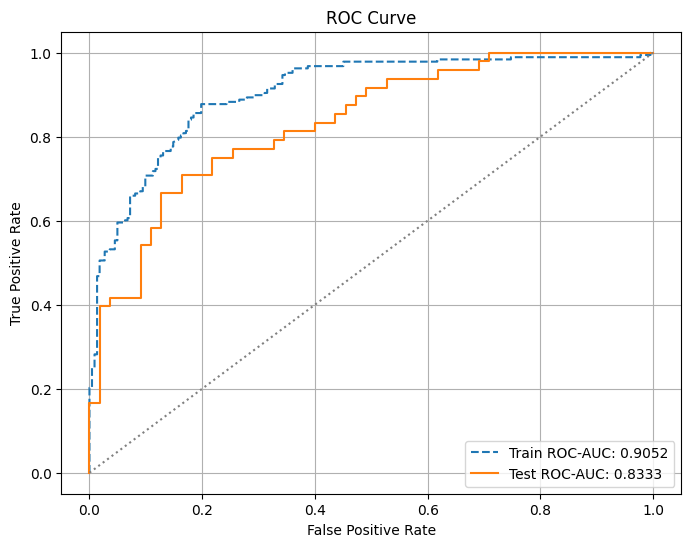

Test Set Results:
Balanced Accuracy: 0.759280303030303
ROC-AUC: 0.8333333333333334


In [26]:
nusvc_model = create_pipeline(
    NuSVC(
        probability=True,
        random_state=42,
        nu=0.6,
        kernel='linear',
        gamma='auto' 
    )
)

# Cross-validation evaluation with standard deviation
cv_results_nusvc = evaluate_model(nusvc_model, X_train, y_train, problem.get_cv(X_train, y_train))
print("Cross-Validation Results:")
print(f"Balanced Accuracy: {cv_results_nusvc['balanced_accuracy']:} ± {cv_results_nusvc['std_balanced_accuracy']:}")
print(f"ROC-AUC: {cv_results_nusvc['roc_auc']:} ± {cv_results_nusvc['std_roc_auc']:}")

# Test set evaluation
test_results_nusvc = test_model(nusvc_model, X_train, y_train, X_test, y_test)
print("Test Set Results:")
print(f"Balanced Accuracy: {test_results_nusvc['test_balanced_accuracy']:}")
print(f"ROC-AUC: {test_results_nusvc['test_roc_auc']:}")

### Stacking

#### Meta Model : Reg Log

In [27]:
stacking_model_reglog = StackingClassifier(
    estimators=[
        ('reglog', reglog_model),
        ('svc', svc_model),
        ('nusvc', nusvc_model)
    ],
    final_estimator=LogisticRegression(),  # Meta-model
    cv=5,
    n_jobs=1
)

# Fit the stacking model
stacking_model_reglog.fit(X_train, y_train)

# Evaluate on the test set
y_pred_stack = stacking_model_reglog.predict(X_test)
y_score_stack = stacking_model_reglog.predict_proba(X_test)[:, 1]

bacc_stack = balanced_accuracy_score(y_test, y_pred_stack)
roc_auc_stack = roc_auc_score(y_test, y_score_stack)

print("Stacking Test Balanced Accuracy:", bacc_stack)
print("Stacking Test ROC-AUC:", roc_auc_stack)

Stacking Test Balanced Accuracy: 0.759280303030303
Stacking Test ROC-AUC: 0.8409090909090909


Cross-Validation Results for Stacking Model:
Balanced Accuracy: 0.747882308145466 ± 0.03479753282941826
ROC-AUC: 0.8370248717617139 ± 0.0395825160757747


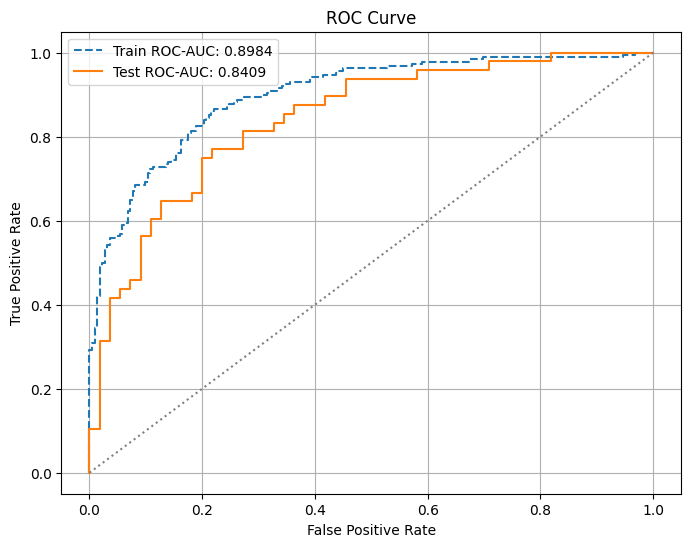


Test Set Results for Stacking Model:
Balanced Accuracy: 0.759280303030303
ROC-AUC: 0.8409090909090909


In [28]:
# Stacking model evaluation
cv_results_stacking_reglog = evaluate_model(stacking_model_reglog, X_train, y_train, problem.get_cv(X_train, y_train))
print("Cross-Validation Results for Stacking Model:")
print(f"Balanced Accuracy: {cv_results_stacking_reglog['balanced_accuracy']:} ± {cv_results_stacking_reglog['std_balanced_accuracy']:}")
print(f"ROC-AUC: {cv_results_stacking_reglog['roc_auc']:} ± {cv_results_stacking_reglog['std_roc_auc']:}")

# Test set evaluation
test_results_stacking_reglog = test_model(stacking_model_reglog, X_train, y_train, X_test, y_test)
print("\nTest Set Results for Stacking Model:")
print(f"Balanced Accuracy: {test_results_stacking_reglog['test_balanced_accuracy']:}")
print(f"ROC-AUC: {test_results_stacking_reglog['test_roc_auc']:}")

### Voting

In [25]:
# Define a refined weight range
weight_range = [0.5, 1.0, 1.5, 2.0, 0.01] 

# Store results
results = []

# Test different weight combinations
for reglog_weight, svc_weight, nusvc_weight in itertools.product(weight_range, repeat=3):
    # Create VotingClassifier with the specified weights
    voting_model = VotingClassifier(
        estimators=[
            ('reglog', reglog_model),
            ('svc', svc_model),
            ('nusvc', nusvc_model),
        ],
        voting='soft',
        weights=[reglog_weight, svc_weight, nusvc_weight],
        n_jobs=-1
    )

    # Evaluate the model on validation set
    voting_model.fit(X_train, y_train)
    y_pred_proba = voting_model.predict_proba(X_test)[:, 1]
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    bacc = balanced_accuracy_score(y_test, (y_pred_proba > 0.5).astype(int))

    # Store results
    results.append({
        'reglog_weight': reglog_weight,
        'svc_weight': svc_weight,
        'nusvc_weight': nusvc_weight,
        'roc_auc': roc_auc,
        'balanced_accuracy': bacc
    })

# Convert results to a DataFrame
results_df = pd.DataFrame(results)

# Display top-performing weight combinations
top_results = results_df.sort_values(by='roc_auc', ascending=False).head(5)
top_results

,reglog_weight,svc_weight,nusvc_weight,roc_auc,balanced_accuracy
97,2.0,0.01,1.5,0.845455,0.761932
71,1.5,0.01,1.0,0.845455,0.761932
76,2.0,0.50,1.0,0.844697,0.761932
80,2.0,1.00,0.5,0.843561,0.761932
95,2.0,0.01,0.5,0.843561,0.771023


Cross-Validation Results:
Balanced Accuracy: 0.756328649223386 ± 0.03887741715247808
ROC-AUC: 0.8352250815408709 ± 0.043683834642937354


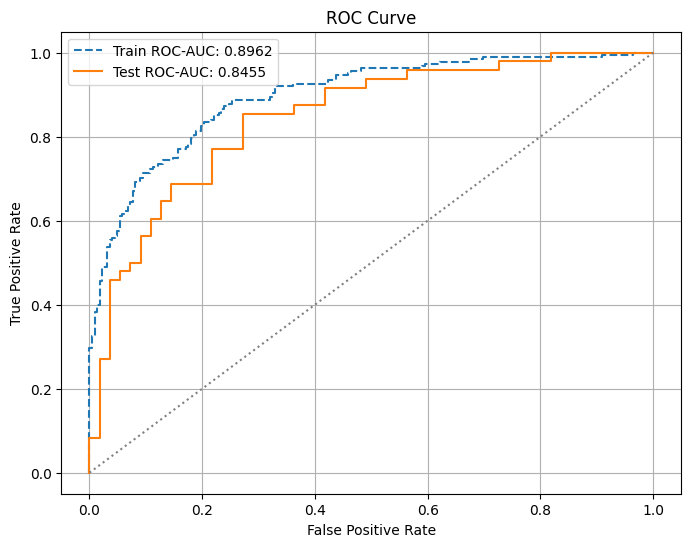


Test Set Results:
Balanced Accuracy: 0.7619318181818182
ROC-AUC: 0.8454545454545456


In [32]:
# Define the best weights from grid search
best_weights = [2.0, 0.01, 1.5]

# Create the VotingClassifier with the best weights
voting_model = VotingClassifier(
    estimators=[
        ('reglog', reglog_model),
        ('svc', svc_model),
        ('nusvc', nusvc_model),
    ],
    voting='soft',
    weights=best_weights,
    n_jobs=-1
)

# Train the model on the full training set
voting_model.fit(X_train, y_train)

# Evaluate with evaluate_model (cross-validation on training data)
cv_results = evaluate_model(voting_model, X_train, y_train, problem.get_cv(X_train, y_train))
print("Cross-Validation Results:")
print(f"Balanced Accuracy: {cv_results['balanced_accuracy']:} ± {cv_results['std_balanced_accuracy']:}")
print(f"ROC-AUC: {cv_results['roc_auc']:} ± {cv_results['std_roc_auc']:}")

# Test on the test set with test_model
test_results = test_model(voting_model, X_train, y_train, X_test, y_test)
print("\nTest Set Results:")
print(f"Balanced Accuracy: {test_results['test_balanced_accuracy']:}")
print(f"ROC-AUC: {test_results['test_roc_auc']:}")

PermutationExplainer explainer: 411it [23:20,  3.44s/it]                         


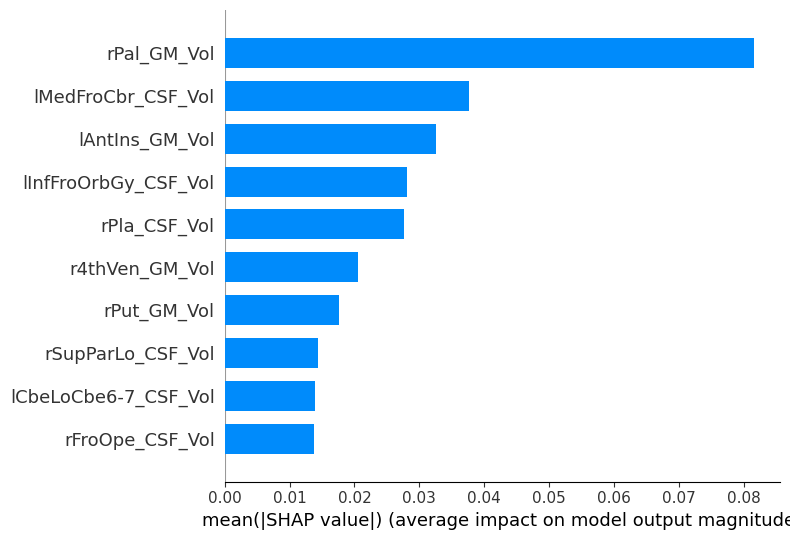

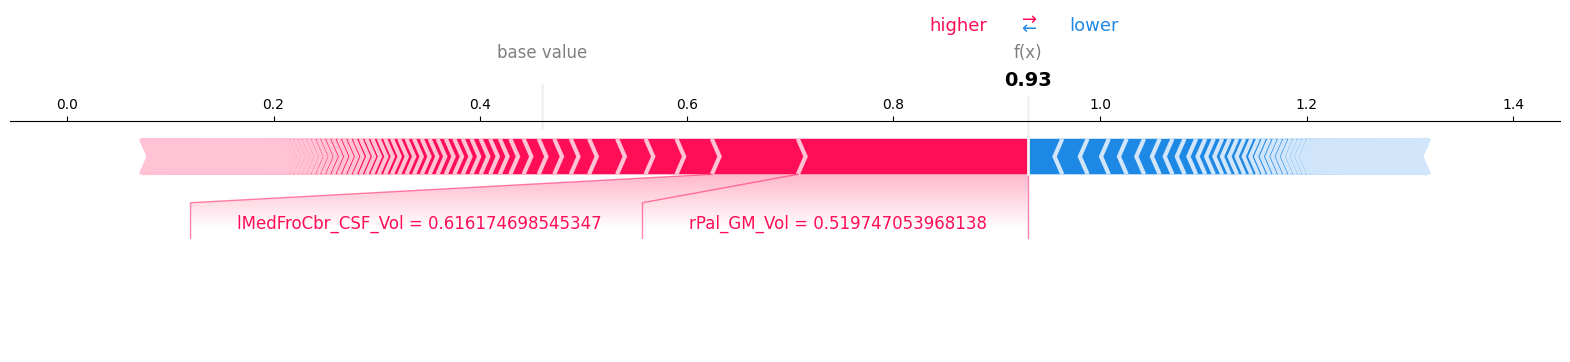

In [37]:
# Get feature names from rois_train DataFrame
feature_names = rois_train.columns[:284].tolist()  # Convert to list for SHAP

class VotingClassifierWrapper:
    def __init__(self, model):
        self.model = model
        
    def predict_proba(self, X):
        X_array = X.to_numpy() if hasattr(X, 'to_numpy') else X
        return self.model.predict_proba(X_array)

voting_wrapper = VotingClassifierWrapper(voting_model)

num_features = X_train.shape[1]
min_evals = max(2 * num_features + 1, 128)

explainer = shap.Explainer(
    voting_wrapper.predict_proba, 
    X_train,
    feature_names=feature_names
)

# Calculate SHAP values
shap_values = explainer(X_train, max_evals=min_evals)

# Summary plot with ROI names
shap.summary_plot(
    shap_values[:,:,1],
    X_train,
    plot_type="bar",
    max_display=10,
    feature_names=feature_names
)

# Force plot with ROI names
sample_index = 0
shap.force_plot(
    shap_values[sample_index,:,1].base_values,
    shap_values[sample_index,:,1].values,
    X_train[sample_index],
    feature_names=feature_names,
    matplotlib=True
)

## Test submission locally

The submissions need to be located in the submissions folder. For instance for `starting_kit`, it should be located in `submissions/submissions/starting_kit`.

Copy everything required (the cell bellow) to build your estimator in a submission file: `submissions/submissions/starting_kit/estimator.py`. This file must contain a function `get_estimator()`:

In [44]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler


class ROIsFeatureExtractor(BaseEstimator, TransformerMixin):
    """Select only the 284 ROIs features:"""

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X[:, :284]


def get_estimator():
    """Build your estimator here."""
    estimator = make_pipeline(
        ROIsFeatureExtractor(), 
        StandardScaler(),
        LogisticRegression(
            random_state=42,
            max_iter=1000,
            C=1.0,            
            penalty='l2',     
            solver='lbfgs' 
        )
    )
    return estimator